In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2024-11-18 15:08:56--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  14.0MB/s    in 1.0s    

2024-11-18 15:08:57 (14.0 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-11-18 15:08:57--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

# איחוד הקבצים
combined_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], ignore_index=True)
emotion_columns = combined_df.columns[9:]
# שמירה לקובץ חדש
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df.to_csv('data/full_dataset/goemotions_combined.csv', index=False)

In [ ]:
user_activity = combined_df['id'].value_counts()
user_activity[user_activity > 1]

,count
id,
eew5j0j,5
eeem310,5
ed9km8y,5
ed1djsl,5
ee8wvo4,5
...,...
ed4agca,2
ee5nmjg,2
edkw3r0,2


In [ ]:
id_groups = combined_df.groupby('id').size()
id_groups[id_groups == 1]


,0
id,
eczqn7t,1
ed02opi,1
ed05yoe,1
ed12xv4,1
ed1bvky,1
...,...
ef5q8eo,1
ef7hvqd,1
efeqyc7,1


In [ ]:
id_sentiment_distribution = combined_df.groupby(['id'])[emotion_columns].sum()
id_sentiment_distribution

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
eczazk6,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eczb07q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
eczb4bm,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
eczb527,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
eczb6r7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efhclgb,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
efhcm78,0,0,0,2,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
efhcnhz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
def get_ids_with_emotion(combined_df, emotion_column, emotion_value=1):
    """
    This function returns all 'id's that have a certain emotion value (default is 1) in the given emotion column.

    Parameters:
    combined_df (DataFrame): The dataframe containing the data.
    emotion_column (str): The column representing the emotion to check.
    emotion_value (int): The value of the emotion to filter by (default is 1 for present emotion).

    Returns:
    list: A list of 'id's that have the specified emotion.
    """
    # Filter rows where the emotion column has the desired value
    filtered_df = combined_df[combined_df[emotion_column] == emotion_value]

    emotion_count_df = filtered_df.groupby('id').size().reset_index(name=f'{emotion_column}_count')

    return emotion_count_df


In [ ]:
ids_with_frustration = get_ids_with_emotion(combined_df, 'joy')

ids_with_frustration

,id,joy_count
0,eczazk6,2
1,eczb07q,2
2,eczb4bm,3
3,eczb527,2
4,eczb6r7,5
...,...,...
57679,efhclgb,3
57680,efhcm78,5
57681,efhcnhz,3
57682,efhcreo,3


In [ ]:
emotion_columns = [col for col in combined_df.columns if col.startswith('id')]

print(emotion_columns)

['id']



The function get_ids_with_multiple_emotions receives a dataframe and a list of emotion columns as input and performs the following steps:

It checks if emotion_columns is a single emotion (string) or a list, and converts it to a list if necessary.
It creates a new dataframe containing the id column and the emotion columns.
It calculates the sum of emotions assigned to each id by adding up the values in the emotion columns.
It filters out ids that have more than one emotion.
It returns the count of occurrences of each emotion for each id with multiple emotions.
The function provides a summary of the emotions assigned to each id that has more than one emotion, showing the counts for each emotion.

In [ ]:
def get_ids_with_multiple_emotions(combined_df, emotion_columns):
    if isinstance(emotion_columns, str):
        emotion_columns = [emotion_columns]

    emotion_data = combined_df[['id'] + list(emotion_columns)]


    emotion_data['emotion_count'] = emotion_data[emotion_columns].sum(axis=1)


    multiple_emotion_data = emotion_data[emotion_data['emotion_count'] > 1]


    emotion_counts = multiple_emotion_data.groupby('id')[emotion_columns].sum()

    return emotion_counts
multiple_emotions_count = get_ids_with_multiple_emotions(combined_df, emotion_columns)
print(multiple_emotions_count)


         admiration  amusement  anger  annoyance  approval  caring  confusion  \
id                                                                              
eczb6r7           0          0      0          0         1       0          0   
eczb770           0          0      0          0         0       0          0   
eczbbmd           0          0      0          0         0       0          0   
eczbbwt           0          2      0          1         0       0          0   
eczbdg4           0          0      0          0         0       3          0   
...             ...        ...    ...        ...       ...     ...        ...   
efhcbr7           1          0      0          0         0       0          0   
efhccrm           0          0      0          1         0       0          0   
efhccs1           0          0      0          0         1       0          0   
efhcm78           0          0      0          1         0       0          0   
efhcreo           1         

<ipython-input-42-12fb0c9af9e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['emotion_count'] = emotion_data[emotion_columns].sum(axis=1)


In [ ]:
multiple_emotions_count

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
id,,,,,,,,,,,,,,,,,,,,,
eczb6r7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
eczb770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
eczbbmd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eczbbwt,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
eczbdg4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efhcbr7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
efhccrm,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
efhccs1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
combined_df[combined_df['id']=='eczb6r7']['text'].iloc[0]

'Emotes have a ridiculous amount of effort put into them, which only makes the fact that nobody uses them sadder'

In [ ]:
multiple_emotions_count.nunique()


,0
admiration,6
amusement,5
anger,4
annoyance,4
approval,6
caring,4
confusion,5
curiosity,4
desire,4
disappointment,4


In [ ]:
multiple_emotions_count.apply(lambda x: x.nunique(), axis=1)


,0
id,
eczb6r7,2
eczb770,2
eczbbmd,2
eczbbwt,3
eczbdg4,2
...,...
efhcbr7,2
efhccrm,2
efhccs1,2


In [ ]:
id_counts = combined_df['id'].value_counts()

# עכשיו תוכל להשתמש ב-id_counts כפי שביקשת קודם
unique_id_data = combined_df[combined_df['id'].isin(id_counts[id_counts == 1].index)]
unique_id_emotions = unique_id_data[emotion_columns].sum()
unique_id_emotions

,0
admiration,5
amusement,3
anger,5
annoyance,4
approval,5
caring,0
confusion,1
curiosity,1
desire,0
disappointment,3


This function generates a dictionary where each emotion is a key, and the value is a list of ids that appear only once in the dataset and are associated with that specific emotion. For each id that appears exactly once, the function checks which emotions are active (indicated by a value of 1) and adds the corresponding id to the list for that emotion.

The function works as follows:

It identifies ids that appear only once in the dataset.
For each of these ids, it checks which emotions are active.
It constructs a dictionary where the key is the emotion, and the value is a list of ids associated with that emotion.
This allows you to track which unique ids correspond to each emotion

In [ ]:
def get_emotion_id_dict_for_unique(combined_df, emotion_columns):
    id_counts = combined_df['id'].value_counts()

    unique_id_data = combined_df[combined_df['id'].isin(id_counts[id_counts == 1].index)]

    emotion_id_dict = {emotion: [] for emotion in emotion_columns}

    for idx, row in unique_id_data.iterrows():
        for emotion in emotion_columns:
            if row[emotion] == 1:
                emotion_id_dict[emotion].append(row['id'])

    return emotion_id_dict

emotion_id_dict = get_emotion_id_dict_for_unique(combined_df, emotion_columns)

print(emotion_id_dict)


{'admiration': ['efeqyc7', 'ed5ciif', 'ed6sm7h', 'edbmghl', 'eemdlx6'], 'amusement': ['edfozcl', 'ed7via6', 'eeibgp2'], 'anger': ['edbmghl', 'ee0v8a8', 'eew6sxz', 'ef7hvqd', 'eeyz5on'], 'annoyance': ['eedz13u', 'eetc9nn', 'ef5hcpz', 'ef37fvz'], 'approval': ['eedz13u', 'ee6nzx6', 'ee81kqw', 'eeghuj1', 'eea7odg'], 'caring': [], 'confusion': ['eeq2vu4'], 'curiosity': ['eeq6q7t'], 'desire': [], 'disappointment': ['ed12xv4', 'eet5j9i', 'eena6cn'], 'disapproval': ['eesddnh', 'edm3bmy', 'efh4fvv', 'eezak7d', 'ee99u3t', 'ef11b1y'], 'disgust': ['eetc9nn', 'eczqn7t'], 'embarrassment': ['efg9j24', 'edh8c4x'], 'excitement': [], 'fear': [], 'gratitude': [], 'grief': [], 'joy': [], 'love': ['efeqyc7', 'edbmghl'], 'nervousness': [], 'optimism': ['ed5azm0', 'ef0gwyt', 'eerolx8'], 'pride': ['ed02opi'], 'realization': ['ed5azm0', 'eeq2vu4'], 'relief': [], 'remorse': ['eeilhea'], 'sadness': ['eeilhea'], 'surprise': [], 'neutral': ['ed5aqi7', 'edzz6mv', 'eedvtie', 'eep8g8o', 'ef5q8eo', 'edlmig1', 'ee8e4ls

In [ ]:
emotion_id_dict

{'admiration': ['efeqyc7', 'ed5ciif', 'ed6sm7h', 'edbmghl', 'eemdlx6'],
 'amusement': ['edfozcl', 'ed7via6', 'eeibgp2'],
 'anger': ['edbmghl', 'ee0v8a8', 'eew6sxz', 'ef7hvqd', 'eeyz5on'],
 'annoyance': ['eedz13u', 'eetc9nn', 'ef5hcpz', 'ef37fvz'],
 'approval': ['eedz13u', 'ee6nzx6', 'ee81kqw', 'eeghuj1', 'eea7odg'],
 'caring': [],
 'confusion': ['eeq2vu4'],
 'curiosity': ['eeq6q7t'],
 'desire': [],
 'disappointment': ['ed12xv4', 'eet5j9i', 'eena6cn'],
 'disapproval': ['eesddnh',
  'edm3bmy',
  'efh4fvv',
  'eezak7d',
  'ee99u3t',
  'ef11b1y'],
 'disgust': ['eetc9nn', 'eczqn7t'],
 'embarrassment': ['efg9j24', 'edh8c4x'],
 'excitement': [],
 'fear': [],
 'gratitude': [],
 'grief': [],
 'joy': [],
 'love': ['efeqyc7', 'edbmghl'],
 'nervousness': [],
 'optimism': ['ed5azm0', 'ef0gwyt', 'eerolx8'],
 'pride': ['ed02opi'],
 'realization': ['ed5azm0', 'eeq2vu4'],
 'relief': [],
 'remorse': ['eeilhea'],
 'sadness': ['eeilhea'],
 'surprise': [],
 'neutral': ['ed5aqi7',
  'edzz6mv',
  'eedvtie',


The function emotion_distribution_for_id takes a dataset (combined_df), a list of emotion columns (emotion_columns), and a specific id. It calculates the distribution of emotions for that id by summing the values in the emotion columns. The function returns a series showing the sum of each emotion for that id. If the id is not found in the dataset, it returns a message indicating so.

In [ ]:
def emotion_distribution_for_id(combined_df, emotion_columns, user_id):

    user_data = combined_df[combined_df['id'] == user_id]

    if user_data.empty:
        return f"ID {user_id} not found in the dataset."

    emotion_distribution = user_data[emotion_columns].sum(axis=0)

    return emotion_distribution

emotion_distribution = emotion_distribution_for_id(combined_df, emotion_columns, 'eczbdg4')
print(emotion_distribution)

admiration        0
amusement         0
anger             0
annoyance         0
approval          0
caring            3
confusion         0
curiosity         0
desire            0
disappointment    0
disapproval       0
disgust           0
embarrassment     0
excitement        0
fear              0
gratitude         0
grief             0
joy               3
love              0
nervousness       0
optimism          0
pride             0
realization       0
relief            0
remorse           0
sadness           0
surprise          0
neutral           0
dtype: int64


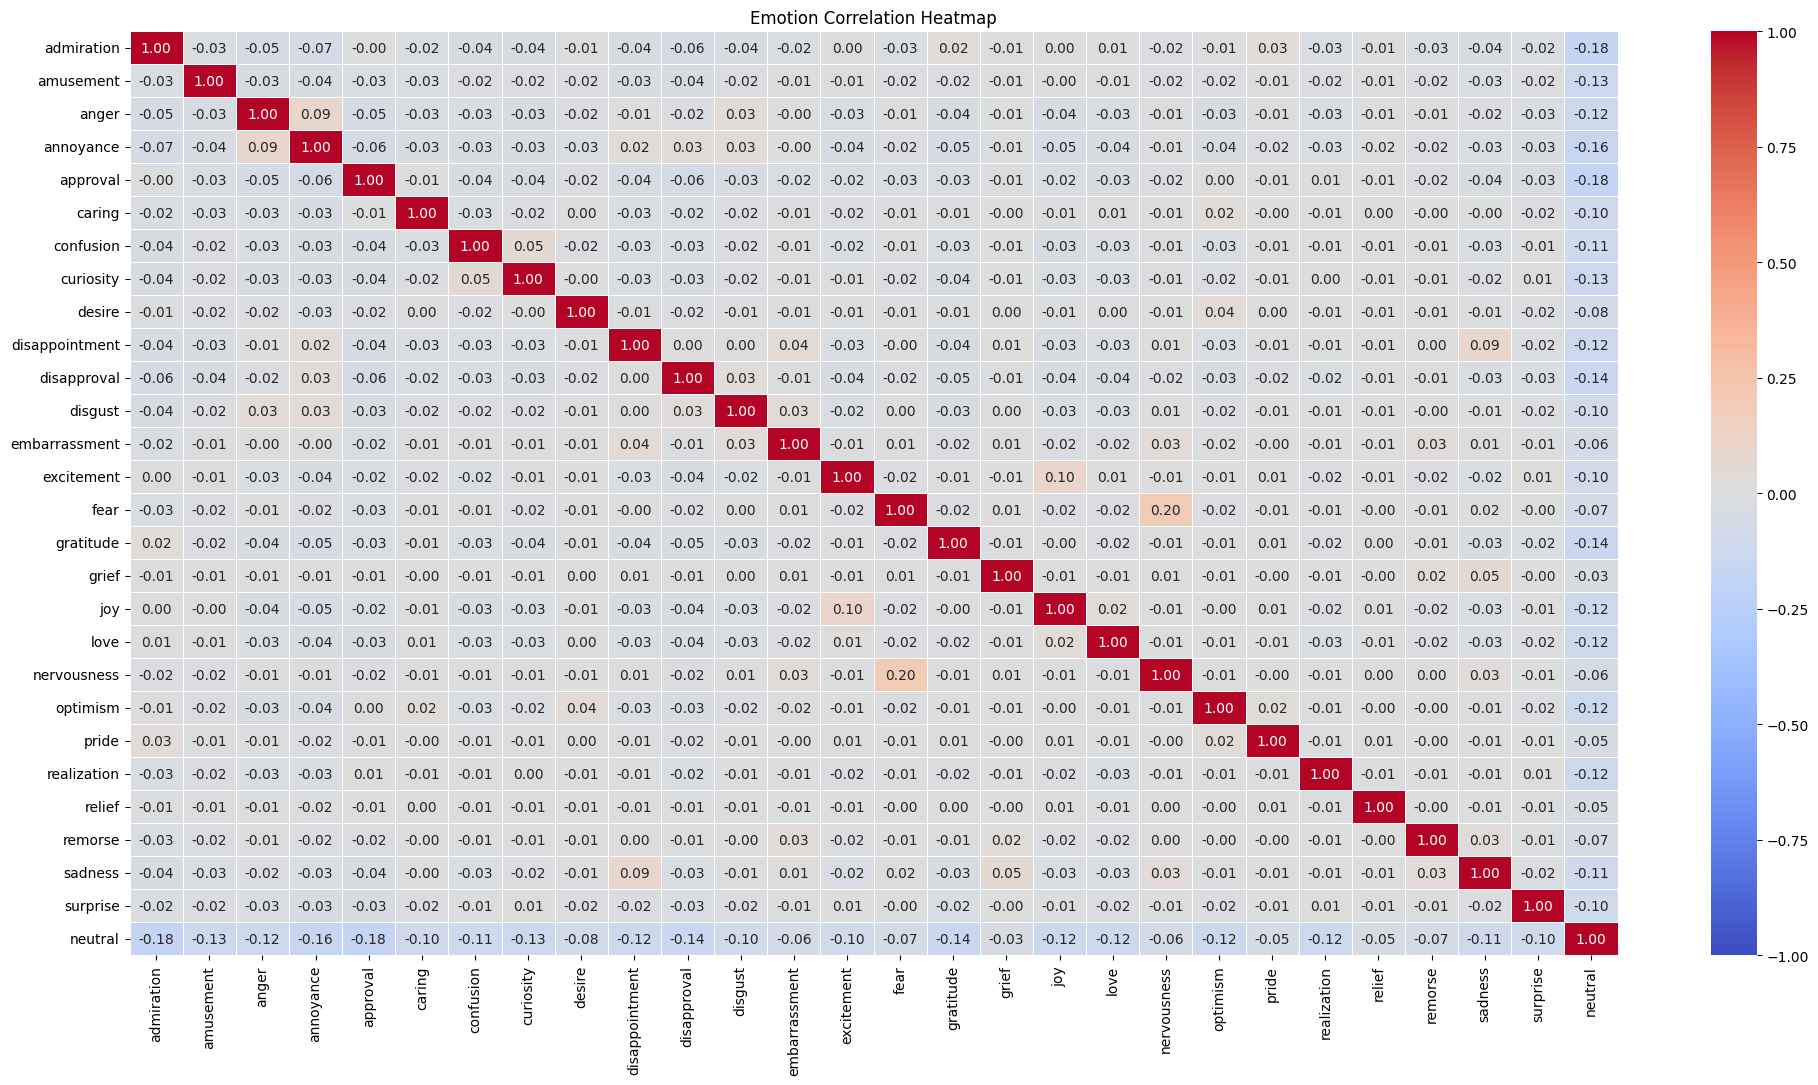

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def emotion_correlations(combined_df, emotion_columns):
    # Compute the correlation matrix
    correlation_matrix = combined_df[emotion_columns].corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(24, 12))  # Adjust size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
    plt.title('Emotion Correlation Heatmap')
    plt.show()

    return correlation_matrix
correlation_matrix = emotion_correlations(combined_df, emotion_columns)

